In [42]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

### **Reading img as np array using matplotlib**

In [29]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")

In [30]:
car1 = mpimg.imread('car_img.jpg')
car1.shape ### height* width * no.of_channels

(135, 195, 3)

In [8]:
type(car1)

numpy.ndarray

## **display the img stored as np array using matplotlib**

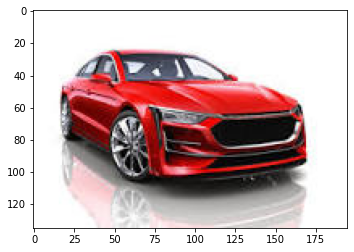

In [9]:
plt.imshow(car1)

### **Reading img as np array using cv2**

In [12]:
car1_cv2 = cv2.imread('car_img.jpg')

## **display the img stored as np array using matplotlib**

In [14]:
cv2.imshow("image", car1_cv2) ## this is DisabledFunctionError issue in colab

DisabledFunctionError: ignored

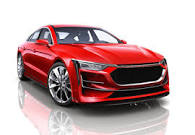

In [15]:
## we can solve the above error by

from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv2) ### cv2 reads the data as BGR

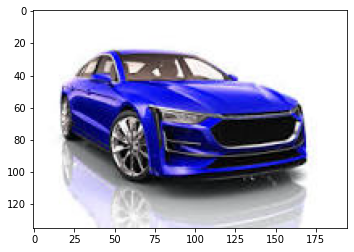

In [16]:
plt.imshow(car1_cv2) ### since matplotlib reads the data as RGB , the colour is different

## **to convert the BGR to RGB using cv2**

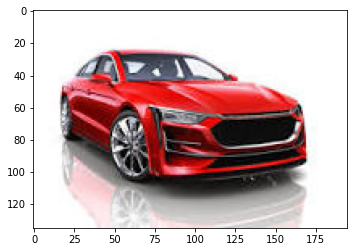

In [17]:
car1_cv2_BGR_to_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_to_RGB)

## **to convert the BGR to gray using cv2**

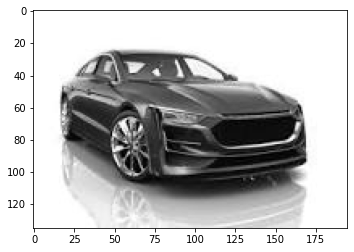

In [18]:
car1_cv2_BGR_to_Gray = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_to_Gray,cmap ="gray")

In [19]:
car1_cv2_BGR_to_Gray.shape

(135, 195)

In [20]:
car1_cv2_BGR_to_Gray.min(), car1_cv2_BGR_to_Gray.max()

(0, 255)

## **to save the image using cv2**

In [22]:
cv2.imwrite("car_gray_scale.jpeg",car1_cv2_BGR_to_Gray)

True

In [23]:
car1_cv2_BGR_to_Gray[0][0] ## value of first pixel of image 

255

### **Understanding composition of colored image using cv2**

In [24]:
from IPython.core.pylabtools import figsize
def visualize_RGB_channels(imgArray = None, fig_size =(10,4)):

  ## splitting the RGB components
  B,G,R = cv2.split(imgArray)

  ## to get only one channel info we need to make other channels as zero channel
  ### zero matrix 
  z = np.zeros(B.shape, dtype = B.dtype)

  ### initializing the subplots
  fig, ax = plt.subplots(2,2, figsize = fig_size) 

  ## to disable the axis for all the 4 axes
  [axi.set_axis_off() for axi in ax.ravel()]


  ## to display the original image
  ax[0,0].set_title("original_image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ## to display the Red Channel image
  ax[0,1].set_title("red image")
  ax[0,1].imshow(cv2.merge((R,z,z)))

  ## to display the Green channel image
  ax[1,0].set_title("green image")
  ax[1,0].imshow(cv2.merge((z,G,z)))

  ## to display the Blue channel image
  ax[1,1].set_title("blue image")
  ax[1,1].imshow(cv2.merge((z,z,B)))  



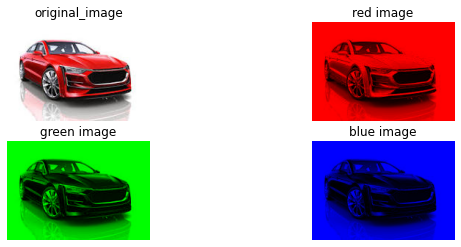

In [25]:
visualize_RGB_channels(imgArray=car1_cv2)

In [26]:
random_colored_img = np.random.randint(0, 255, (6,6,3))
random_colored_img.shape

(6, 6, 3)

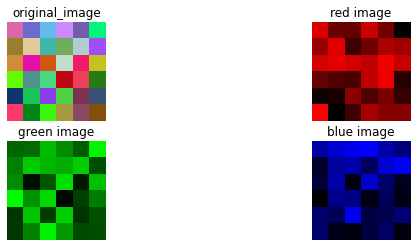

In [27]:
visualize_RGB_channels(imgArray=random_colored_img)

## ***Understanding Filters***

In [35]:
### sobel filter


## to detect vertical edges
sobel_filter_ver = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(sobel_filter)
sobel_filter_hor = sobel_filter_ver.T
print("\n",sobel_filter_hor)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


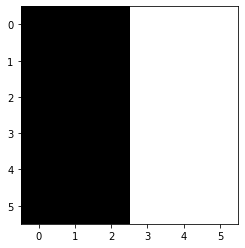

In [39]:
### example 1
example1 = np.array([[0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255]])
plt.imshow(example1, cmap="gray")

In [60]:
### we can see there is one vertical seperation in the image

### function to find the edges
def find_edges(imgFilter= None, picture= None):
  p_row, p_col = picture.shape
  k = imgFilter.shape[0]
  stride = 1 #so, no skipping of pixel while applying the filter or kernel

  temp = list() # to store the final result i.e feature map
  final_col = (p_col -k)//stride  +1
  final_rows = (p_row-k)//stride +1 

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontally right stride across col by col
    for h_stride in range(final_col):
      target_area_of_pic = picture[v_stride: v_stride+k, h_stride:h_stride+k]
      temp.append(sum(sum(imgFilter*target_area_of_pic)))
  return np.array(temp).reshape(final_rows, final_col)

In [64]:
sum(sum(example1))

4590

In [62]:
result= find_edges(imgFilter=sobel_filter_ver,picture= example1)
result ## here we can see below the vertical edges are having more values at middle 

array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

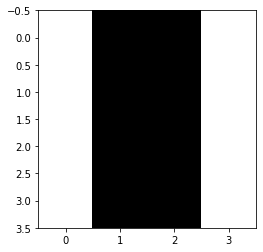

In [66]:
plt.imshow(result,cmap="gray")

In [68]:
## suppose if we apply horizontal filter on the image we cant find any edges
result_2= find_edges(imgFilter=sobel_filter_hor,picture= example1)
result_2 


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

### **lets apply the filter on the actual images**

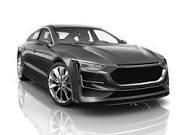

In [70]:
cv2_imshow(car1_cv2_BGR_to_Gray) ## actual grayscale image

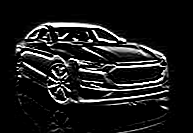

In [73]:
### horizontal filter applied on the image

filter_car_hor = find_edges(imgFilter=sobel_filter_hor, picture=car1_cv2_BGR_to_Gray)
cv2_imshow(filter_car_hor)

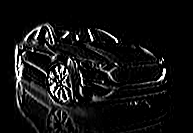

In [75]:
### vertical filter applied on the image

filter_car_ver = find_edges(imgFilter=sobel_filter_ver, picture=car1_cv2_BGR_to_Gray)
cv2_imshow(filter_car_ver)